# <font color='blue'>Machine Learning - Modelo preditivo de Classificacao</font>



### Usando SVM (Suporte Vector Machine)  Para Prever a Inten√ß√£o de Compra de Usu√°rios de E-Commerce

### Defini√ß√£o do Problema de Neg√≥cio:

Meu trabalho ser√° avaliar quais atributos influenciam um usu√°rio na compra de produtos online e construir um modelo preditivo para realizar previs√µes de compras futuras.

Usarei como fonte de dados o dataset:

Online Shoppers Purchasing Intention Dataset

https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

O conjunto de dados consiste em 10 atributos num√©ricos e 8 categ√≥ricos. O atributo 'Revenue' pode ser usado como o r√≥tulo da classe, ou seja, vari√°vel ALVO

## Importando os pacotes a serem utilizados

In [334]:
# Importando bibliotecas que irei utilizar...

import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn import svm
import sklearn
import matplotlib
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings('ignore', category=DeprecationWarning)

- sklearn : √â uma biblioteca de c√≥digo aberto que fornece ferramentas simples e eficientes para: aprendizado supervisionado e n√£o supervisionado, pr√©-processamento de dados, avalia√ß√£o de modelos e sele√ß√£o de modelos.
  
- O LabelEncoder √© uma ferramenta do scikit-learn usada para transformar r√≥tulos categ√≥ricos (texto ou classes) em valores num√©ricos, permitindo que algoritmos de Machine Learning processem dados categ√≥ricos
  
- StandardScaler √© uma t√©cnica de pr√©-processamento de dados do scikit-learn usada para padronizar/normalizar features num√©ricas, garantindo que todas tenham a mesma escala. Isso √© crucial para muitos algoritmos de Machine Learning que s√£o sens√≠veis √† magnitude dos dados (ex: SVM, KNN, Regress√£o Linear).

## Carga e Dicion√°rio de Dados

In [336]:
# Carregando os dados

df_original = pd.read_csv('online_shoppers_intention.csv')
df_original.head()

Administrative  Administrative_Duration  Informational  \
0             0.0                      0.0            0.0   
1             0.0                      0.0            0.0   
2             0.0                     -1.0            0.0   
3             0.0                      0.0            0.0   
4             0.0                      0.0            0.0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0             1.0                 0.000000   
1                     0.0             2.0                64.000000   
2                    -1.0             1.0                -1.000000   
3                     0.0             2.0                 2.666667   
4                     0.0            10.0               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

Dicion√°rio de Dados:

"Administrativo", "Dura√ß√£o administrativa", "Informativo", "Dura√ß√£o informativo", "Relacionado ao produto" e "Dura√ß√£o relacionada ao produto" representam o n√∫mero de diferentes tipos de p√°ginas visitadas pelo visitante nessa sess√£o e o tempo total gasto em cada uma dessas categorias de p√°gina. Os valores desses recursos s√£o derivados das informa√ß√µes de URL das p√°ginas visitadas pelo usu√°rio e atualizadas em tempo real quando um usu√°rio executa uma a√ß√£o, por exemplo, passando de uma p√°gina para outra. 

Os recursos "Taxa de rejei√ß√£o", "Taxa de sa√≠da" e "Valor da p√°gina" representam as m√©tricas medidas pelo "Google Analytics" para cada p√°gina no site de com√©rcio eletr√¥nico. 

O valor do recurso "Taxa de rejei√ß√£o" de uma p√°gina da web refere-se √† porcentagem de visitantes que entram no site a partir dessa p√°gina e saem ("rejei√ß√£o") sem acionar outras solicita√ß√µes ao servidor durante essa sess√£o. 

O valor do recurso "Taxa de sa√≠da" para uma p√°gina da web espec√≠fica √© calculado como a porcentagem que foi a √∫ltima na sess√£o, para todas as exibi√ß√µes de p√°gina a p√°gina. 

O recurso "Valor da p√°gina" representa o valor m√©dio para uma p√°gina da web que um usu√°rio visitou antes de concluir uma transa√ß√£o de com√©rcio eletr√¥nico. 

O recurso "Dia especial" indica a proximidade do hor√°rio de visita do site a um dia especial espec√≠fico (por exemplo, dia das m√£es, dia dos namorados) em que as sess√µes t√™m mais probabilidade de serem finalizadas com a transa√ß√£o. O valor desse atributo √© determinado considerando a din√¢mica do com√©rcio eletr√¥nico, como a dura√ß√£o entre a data do pedido e a data de entrega. Por exemplo, no dia dos namorados, esse valor assume um valor diferente de zero entre 2 e 12 de fevereiro (dia dos namorados nos EUA e Europa), zero antes e depois dessa data, a menos que esteja pr√≥ximo de outro dia especial e seu valor m√°ximo de 1 em 8 de fevereiro. 

O conjunto de dados tamb√©m inclui o tipo de sistema operacional, navegador, regi√£o, tipo de tr√°fego, tipo de visitante como visitante novo ou recorrente, um valor booleano indicando se a data da visita √© final de semana e m√™s do ano.

A vari√°vel alvo (Revenue) √© booleana, com True se a sess√£o gerou receita e False se n√£o gerou.

## An√°lise Explorat√≥ria

In [13]:
# Shape dos dados

df_original.shape

(12330, 18)

In [15]:
# Tipos de Dados

df_original.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [17]:
# Verificando valores missing

print(df_original.isna().sum())

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64


In [21]:
# Removendo as linhas com valores missing
# vamos excluir esses valores, porque 14 dados dentro de um volume de mais de 12 mil linhas, nesse caso
# n√£o vai fazer diferen√ßa.

df_original.dropna(inplace = True)

In [23]:
# Verificando valores missing

print(df_original.isna().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [25]:
# Shape

df_original.shape

(12316, 18)

In [27]:
# Verificando Valores √önicos

df_original.nunique()

Administrative               27
Administrative_Duration    3336
Informational                17
Informational_Duration     1259
ProductRelated              311
ProductRelated_Duration    9552
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

Vari√°ves categ√≥ricas s√£o aquelas do tipo String, vari√°veis cont√≠nuas s√£o as vari√°veis num√©ricas. Portanto, as categ√≥ricas, vamos fazer um tratamento diferenciado para elas.

Para fins de visualiza√ß√£o, dividirei os dados em vari√°veis cont√≠nuas e categ√≥ricas. Tratarei todas as vari√°veis com menos de 30 entradas √∫nicas como categ√≥ricas.

In [32]:
# Preparando os dados para o plot

# Cria uma c√≥pia do dataset original
df = df_original.copy()

# Listas vazias para os resultados
continuous = []
categorical = []

# Loop pelas colunas
for c in df.columns[:-1]:
    if df.nunique()[c] >= 30:
        continuous.append(c)
    else:
        categorical.append(c)

In [34]:
continuous

['Administrative_Duration',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues']

In [36]:
categorical

['Administrative',
 'Informational',
 'SpecialDay',
 'Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend']

In [38]:
# Vari√°veis cont√≠nuas

df[continuous].head()

Administrative_Duration  Informational_Duration  ProductRelated  \
0                      0.0                     0.0             1.0   
1                      0.0                     0.0             2.0   
2                     -1.0                    -1.0             1.0   
3                      0.0                     0.0             2.0   
4                      0.0                     0.0            10.0   

   ProductRelated_Duration  BounceRates  ExitRates  PageValues  
0                 0.000000         0.20       0.20         0.0  
1                64.000000         0.00       0.10         0.0  
2                -1.000000         0.20       0.20         0.0  
3                 2.666667         0.05       0.14         0.0  
4               627.500000         0.02       0.05         0.0

In [40]:
# Vari√°veis categ√≥ricas

df[categorical].head()

Administrative  Informational  SpecialDay Month  OperatingSystems  Browser  \
0             0.0            0.0         0.0   Feb                 1        1   
1             0.0            0.0         0.0   Feb                 2        2   
2             0.0            0.0         0.0   Feb                 4        1   
3             0.0            0.0         0.0   Feb                 3        2   
4             0.0            0.0         0.0   Feb                 3        3   

   Region  TrafficType        VisitorType  Weekend  
0       1            1  Returning_Visitor    False  
1       1            2  Returning_Visitor    False  
2       9            3  Returning_Visitor    False  
3       2            4  Returning_Visitor    False  
4       1            4  Returning_Visitor     True

### Gr√°ficos para vari√°veis num√©ricas.

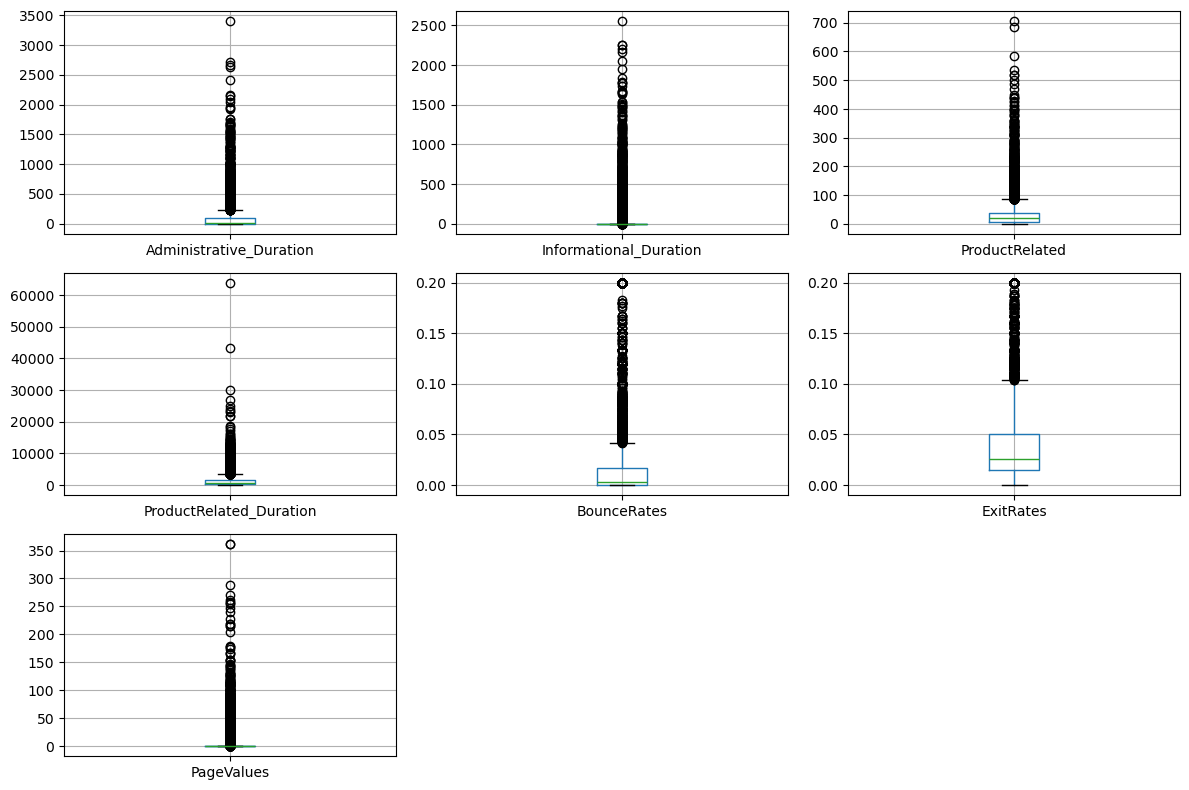

In [42]:
# Plot das vari√°veis cont√≠nuas

# Tamanho da √°rea de plotagem
fig = plt.figure(figsize = (12,8))

# Loop pelas vari√°veis cont√≠nuas
for i, col in enumerate(continuous):
    plt.subplot(3, 3, i + 1);
    df.boxplot(col);
    plt.tight_layout()
    
# Podemos salvar tamb√©m nossa imagem dos BoxPlosts    
plt.savefig('boxplot1.png')

<p> As vari√°veis cont√≠nuas parecem extremamente distorcidas. Vou aplicar transforma√ß√£o de log (logaritmo) para melhor visualiza√ß√£o desses dados.

In [45]:
# Transforma√ß√£o de log nas vari√°veis cont√≠nuas

df[continuous] = np.log1p(1 + df[continuous])

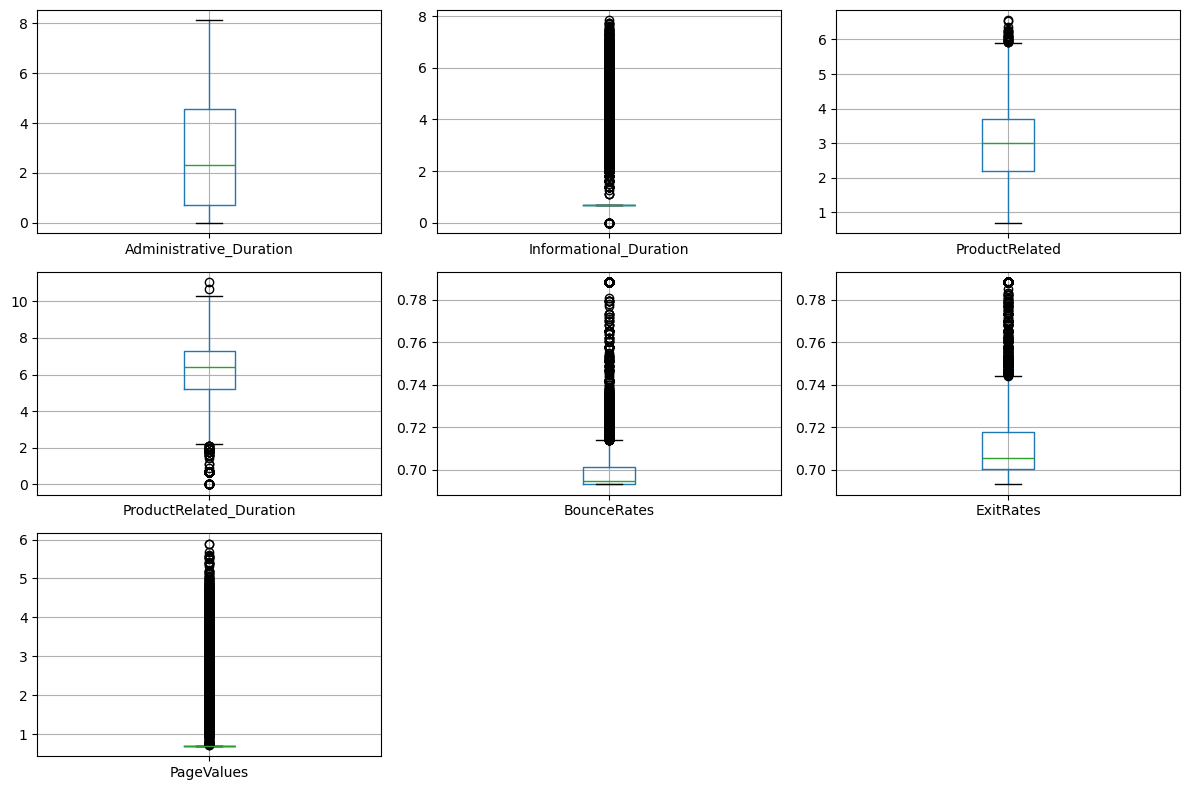

In [47]:
# Plot das vari√°veis cont√≠nuas

# Tamanho da √°rea de plotagem
fig = plt.figure(figsize = (12,8))

# Loop pelas vari√°veis cont√≠nuas
for i,col in enumerate(continuous):
    plt.subplot(3,3,i+1);
    df.boxplot(col);
    plt.tight_layout()
plt.savefig('boxplot2.png')

Matriz de Correla√ß√£o Entre Vari√°veis Cont√≠nuas.

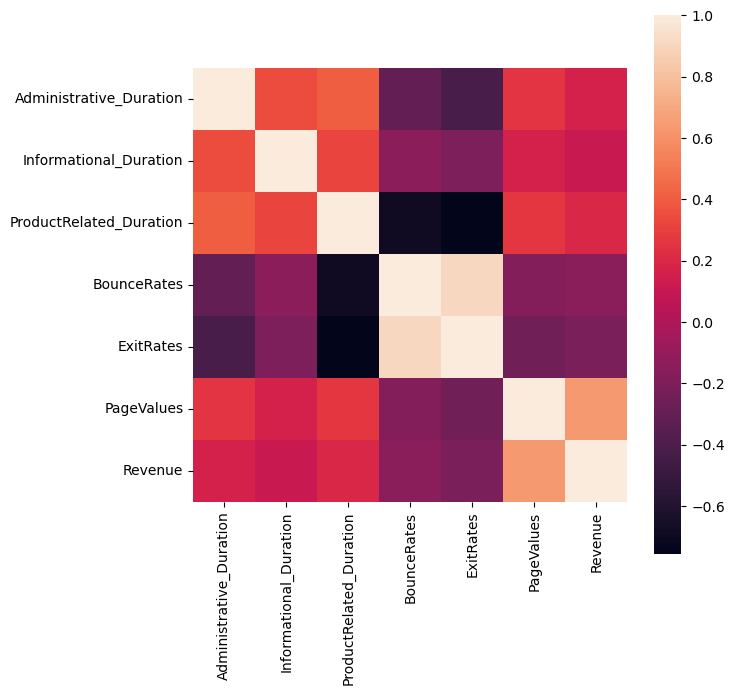

In [51]:
# √Årea de plotagem
plt.figure(figsize = (7,7))

# Matriz de Correla√ß√£o 
sns.heatmap(df[['Administrative_Duration',
                'Informational_Duration',  
                'ProductRelated_Duration',
                'BounceRates', 
                'ExitRates', 
                'PageValues',
                'Revenue']].corr(), vmax = 1., square = True)
plt.show()

Visualiza√ß√£o de gr√°ficos de vari√°veis categ√≥ricas para analisar como a vari√°vel de destino √© influenciada por elas.

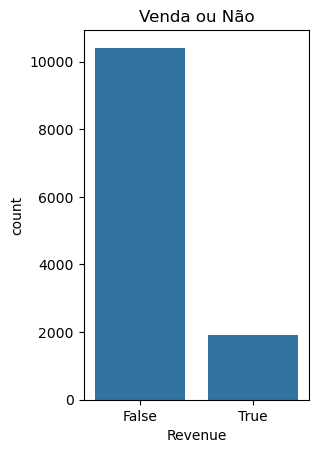

In [90]:
# Countplot Venda ou N√£o
# warnings.filterwarnings("ignore", category=FutureWarning)
# Aqui nesse gr√°fico conseguimos ver a diferen√ßa do p√∫blico de vendas e de n√£o vendas

plt.subplot(1, 2, 2)
plt.title("Venda ou N√£o")  
sns.countplot(x='Revenue', data=df)
plt.show()



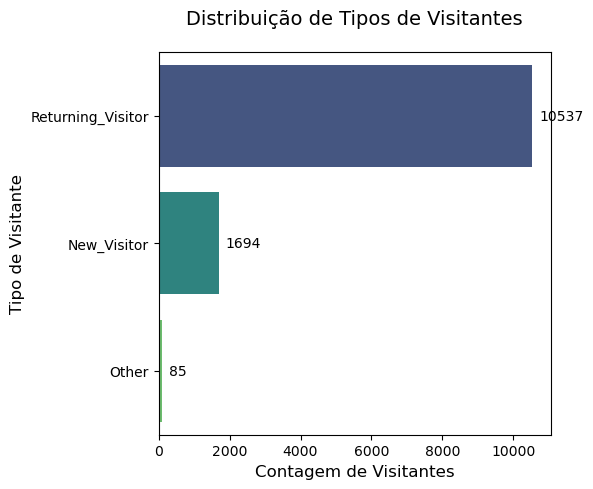

In [80]:
plt.figure(figsize=(6, 5))  # Ajusta o tamanho do gr√°fico

# Gr√°fico de barras horizontais com cores diferentes
sns.countplot(y='VisitorType', 
              data=df, 
              palette='viridis',  # Esquema de cores diferente
              order=df['VisitorType'].value_counts().index)  # Ordena por frequ√™ncia

# Melhorando os r√≥tulos e t√≠tulo
plt.xlabel('Contagem de Visitantes', fontsize=12)
plt.ylabel('Tipo de Visitante', fontsize=12)
plt.title('Distribui√ß√£o de Tipos de Visitantes', fontsize=14, pad=20)

# Adiciona os valores nas barras
for p in plt.gca().patches:
    width = p.get_width()
    plt.gca().annotate(f'{int(width)}', 
                      (width, p.get_y() + p.get_height()/2.),
                      ha='left', va='center',
                      xytext=(5, 0),
                      textcoords='offset points')

plt.tight_layout()  # Ajusta o layout para evitar cortes
plt.show()

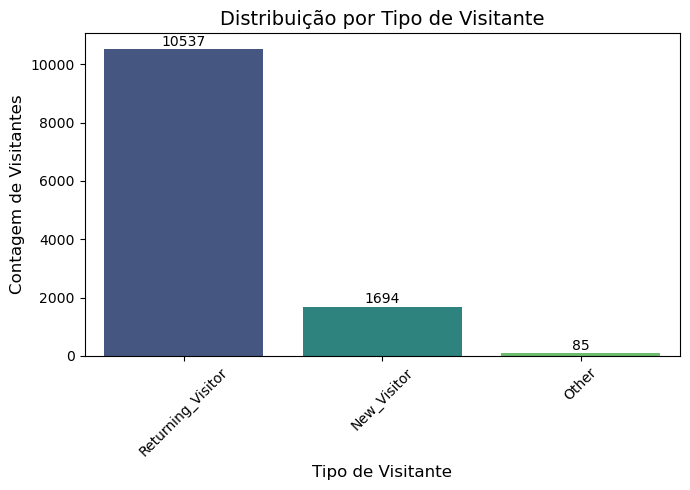

In [76]:
# Configura√ß√£o do gr√°fico
plt.figure(figsize=(7, 5))

# Gr√°fico de barras VERTICAIS (padr√£o)
ax = sns.countplot(x='VisitorType', 
                   data=df, 
                   palette='viridis',  # Cores diferentes
                   order=df['VisitorType'].value_counts().index)  # Ordena por frequ√™ncia

# Personaliza√ß√£o
plt.xlabel("Tipo de Visitante", fontsize=12)
plt.ylabel("Contagem de Visitantes", fontsize=12)
plt.title("Distribui√ß√£o por Tipo de Visitante", fontsize=14)

# Adiciona os valores no topo das barras
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., 
            height + 5,  # Posiciona o texto acima da barra
            f'{int(height)}', 
            ha='center', 
            va='bottom')

plt.xticks(rotation=45)  # Rotaciona r√≥tulos do eixo X se necess√°rio
plt.tight_layout()  # Ajusta o layout
plt.show()

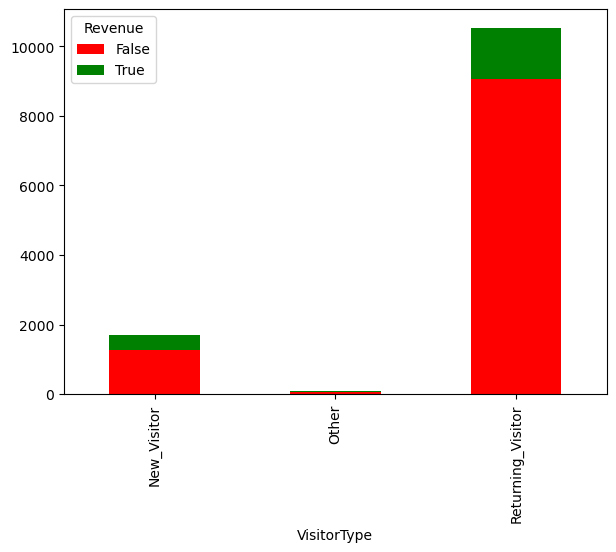

In [92]:
# Stacked Bar Tipo de Visitante x Revenue
# Aqui conseguimos ver a diferen√ßa de vendas e n√£o vendas dentro dos tipos de p√∫blicos.

pd.crosstab(df['VisitorType'], df['Revenue']).plot(kind = 'bar', 
                                                   stacked = True, 
                                                   figsize = (7, 5), 
                                                   color = ['red', 'green'])
plt.show()

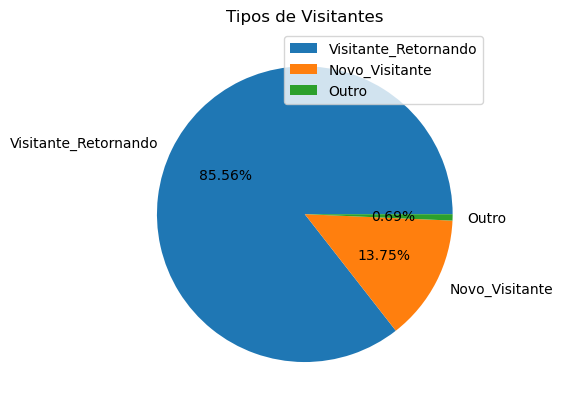

In [100]:
# Gr√°fico de Pizza de Tipos de Visitantes
# Aqui n√≥s temos um outro tipo de visualiza√ß√£o

labels = ['Visitante_Retornando', 'Novo_Visitante', 'Outro']
plt.title("Tipos de Visitantes")
plt.pie(df['VisitorType'].value_counts(), labels = labels, autopct = '%.2f%%')
plt.legend()
plt.show()

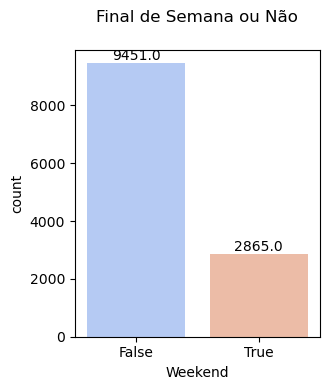

In [112]:
# Countplot Final de Semana ou N√£o

plt.figure(figsize=(6, 4))
plt.subplot(1, 2, 1)
plt.title("Final de Semana ou N√£o", pad=20)  # pad adiciona espa√ßamento
ax = sns.countplot(x='Weekend', data=df, palette='coolwarm')

# Adiciona valores nas barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')
    
plt.tight_layout()  # Ajusta automaticamente os espa√ßos
plt.show()

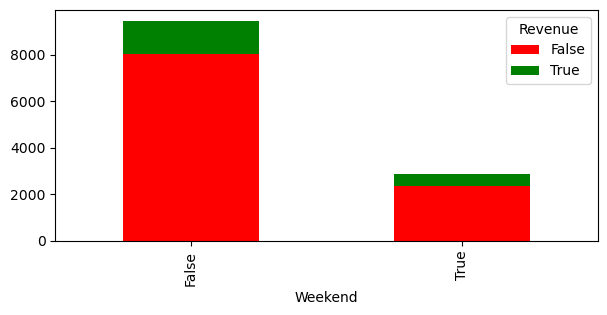

In [118]:
# Stacked Bar Final de Semana x Revenue

pd.crosstab(df['Weekend'], df['Revenue']).plot(kind = 'bar', 
                                               stacked = True, 
                                               figsize = (7, 3), 
                                               color = ['red', 'green'])
plt.show()

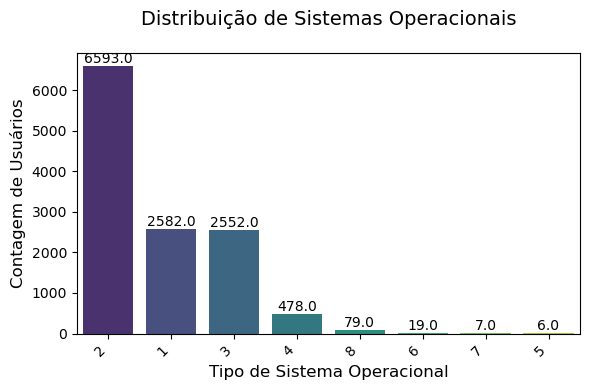

In [136]:
# Countplot Tipos de Sistemas Operacionais
# N√≥s n√£o temos os nomes dos sistemas operacionais porque o arquivo foi disponibilizado sem o nome. Podemos deduzir que o 
# que apresenta maior contagem provavelmente √© o sistema operacional windows porque √© o sistema operacional que mais tem no mercado.

plt.figure(figsize=(6, 4)) 

#  personaliza√ß√µes
ax = sns.countplot(x='OperatingSystems', 
                   data=df,
                   palette='viridis',  # Esquema de cores mais claro
                   order=df['OperatingSystems'].value_counts().index)  # Ordena por frequ√™ncia

# Melhorando os t√≠tulos e r√≥tulos
plt.title("Distribui√ß√£o de Sistemas Operacionais", fontsize=14, pad=20)
plt.xlabel("Tipo de Sistema Operacional", fontsize=12)
plt.ylabel("Contagem de Usu√°rios", fontsize=12)

# Adicionando os valores em cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

# Melhorando os ticks do eixo X
plt.xticks(rotation=45, ha='right')  # Rotaciona 45 graus para melhor leitura

plt.tight_layout()  # Ajusta o layout automaticamente
plt.show()

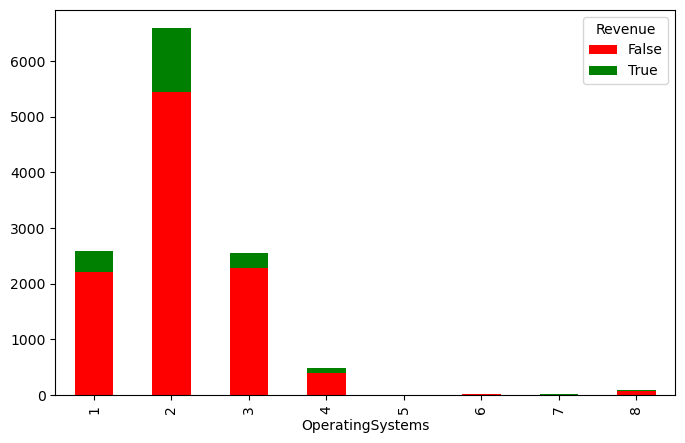

In [138]:
# Stacked Bar Tipo de SO x Revenue

pd.crosstab(df['OperatingSystems'], df['Revenue']).plot(kind = 'bar', 
                                                        stacked = True, 
                                                        figsize = (8, 5), 
                                                        color = ['red', 'green'])
plt.show()

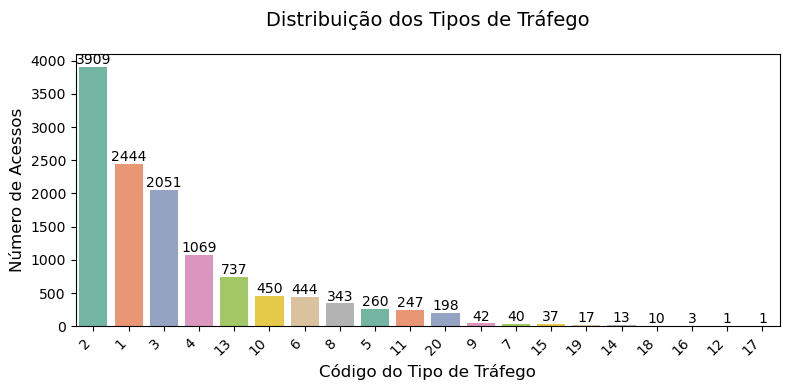

In [154]:
# Countplot Tipo de Tr√°fego

plt.figure(figsize=(8, 4))  # Definindo o tamanho adequado

# Criando o gr√°fico com tratamento para poss√≠veis erros
ax = sns.countplot(x='TrafficType', 
                   data=df,
                   palette='Set2',  # Paleta de cores mais acess√≠vel
                   order=df['TrafficType'].value_counts().index)  # Ordenando por frequ√™ncia

# Adicionando t√≠tulos e r√≥tulos com formata√ß√£o
plt.title("Distribui√ß√£o dos Tipos de Tr√°fego", fontsize=14, pad=20)
plt.xlabel("C√≥digo do Tipo de Tr√°fego", fontsize=12)
plt.ylabel("N√∫mero de Acessos", fontsize=12)

# Adicionando os valores nas barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points',
                fontsize=10)

# Ajustando os r√≥tulos do eixo X
plt.xticks(rotation=45, ha='right')  # Rota√ß√£o para melhor legibilidade

plt.tight_layout()  # Ajuste autom√°tico do layout
plt.show()

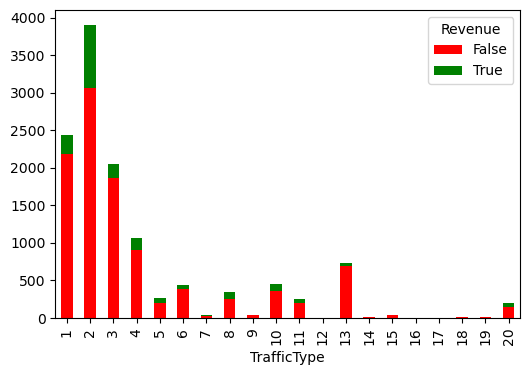

In [142]:
# Stacked Bar Tipos de Tr√°fego x Revenue

pd.crosstab(df['TrafficType'], df['Revenue']).plot(kind = 'bar', 
                                                   stacked = True, 
                                                   figsize = (6, 4), 
                                                   color = ['red', 'green'])
plt.show()

## Pr√©-Processamento dos Dados

In [156]:
df_original.head()

Administrative  Administrative_Duration  Informational  \
0             0.0                      0.0            0.0   
1             0.0                      0.0            0.0   
2             0.0                     -1.0            0.0   
3             0.0                      0.0            0.0   
4             0.0                      0.0            0.0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0             1.0                 0.000000   
1                     0.0             2.0                64.000000   
2                    -1.0             1.0                -1.000000   
3                     0.0             2.0                 2.666667   
4                     0.0            10.0               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [164]:
# Cria o encoder
lb = LabelEncoder()

# S√£o vari√°veis categ√≥ricas que est√£o como texto, ent√£o n√≥s aplicamos a fun√ß√£o para que essa vari√°vel se torne um n√∫mero, isso porque
# o modelo preditivo, modelo de machine learning n√£o entende letras, s√≥ entende n√∫meros. E se n√£o fizermos esse tratamento, ele simplesmente n√£o
# vai ler essas vari√°veis e com isso vamos perder esses dados. 

# Aplica o encoder nas vari√°veis que est√£o com string
df_original['Month'] = lb.fit_transform(df_original['Month'])
df_original['VisitorType'] = lb.fit_transform(df_original['VisitorType'])

# Remove valores missing eventualmente gerados
df_original.dropna(inplace = True)

In [170]:
df_original.head()

Administrative  Administrative_Duration  Informational  \
0             0.0                      0.0            0.0   
1             0.0                      0.0            0.0   
2             0.0                     -1.0            0.0   
3             0.0                      0.0            0.0   
4             0.0                      0.0            0.0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0             1.0                 0.000000   
1                     0.0             2.0                64.000000   
2                    -1.0             1.0                -1.000000   
3                     0.0             2.0                 2.666667   
4                     0.0            10.0               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0      2                 1   
1         0.00       0.10         0.0         0.0      2                 2   
2         0.20       0.20         0.0         0.0      2                 4   
3         0.05       0.14         0.0         0.0      2                 3   
4         0.02       0.05         0.0         0.0      2                 3   

   Browser  Region  TrafficType  VisitorType  Weekend  Revenue  
0        1       1            1            2    False    False  
1        2       1            2            2    False    False  
2        1       9            3            2    False    False  
3        2       2            4            2    False    False  
4        3       1            4            2     True    False

In [172]:
# Shape

df_original.shape

(12316, 18)

In [176]:
# Verificando se a vari√°vel resposta est√° balanceada
# Aqui podemos ver que ela n√£o est√° balanceada.

target_count = df_original.Revenue.value_counts()
target_count

Revenue
False    10408
True      1908
Name: count, dtype: int64

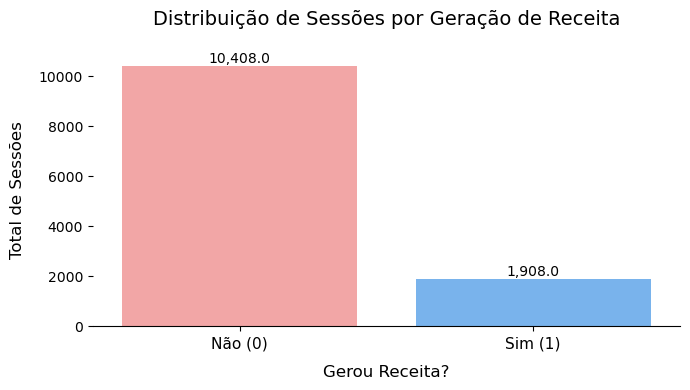

In [198]:
# Plot 

plt.figure(figsize=(7, 4))  # Definindo o tamanho do gr√°fico

# Gr√°fico com formata√ß√£o profissional
ax = sns.countplot(x='Revenue', 
                   data=df_original,
                   palette=['#ff9999', '#66b3ff'],  # Cores personalizadas (N√£o/Sim)
                   order=[False, True])  # Ordem l√≥gica

# Removendo as bordas do gr√°fico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Adicionando os valores exatos nas barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():,}',  # Formato com separador de milhar
                (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points',
                fontsize=10)

# R√≥tulos
plt.xlabel('Gerou Receita?', fontsize=12, labelpad=10)
plt.ylabel('Total de Sess√µes', fontsize=12, labelpad=10)
plt.title('Distribui√ß√£o de Sess√µes por Gera√ß√£o de Receita', fontsize=14, pad=20)

# Ajustando os ticks do eixo X para mostrar "N√£o" e "Sim"
plt.xticks(ticks=[0, 1], labels=['N√£o (0)', 'Sim (1)'], fontsize=11)

plt.tight_layout()
plt.show()

In [202]:
# Instalar e importar o pacote imblearn
# Se apresentar erro na instala√ß√£o execute este comando !pip install scikit-learn==1.1.0 --user 
# Ap√≥s a atualiza√ß√£o estar completa, reinicie o jupyter notebook.
#!pip install -q imblearn
#import imblearn

In [226]:
!pip install -q imblearn

In [228]:
import imblearn

In [204]:
# Shape
df_original.shape

(12316, 18)

In [208]:
# Vari√°veis explicativas

df_original.iloc[:, 0:17].head()

Administrative  Administrative_Duration  Informational  \
0             0.0                      0.0            0.0   
1             0.0                      0.0            0.0   
2             0.0                     -1.0            0.0   
3             0.0                      0.0            0.0   
4             0.0                      0.0            0.0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0             1.0                 0.000000   
1                     0.0             2.0                64.000000   
2                    -1.0             1.0                -1.000000   
3                     0.0             2.0                 2.666667   
4                     0.0            10.0               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0      2                 1   
1         0.00       0.10         0.0         0.0      2                 2   
2         0.20       0.20         0.0         0.0      2                 4   
3         0.05       0.14         0.0         0.0      2                 3   
4         0.02       0.05         0.0         0.0      2                 3   

   Browser  Region  TrafficType  VisitorType  Weekend  
0        1       1            1            2    False  
1        2       1            2            2    False  
2        1       9            3            2    False  
3        2       2            4            2    False  
4        3       1            4            2     True

In [212]:
# Vari√°vel Target
# Aqui estamos separando a vari√°vel target das outras vari√°veis.

df_original.iloc[:, 17].head()

0    False
1    False
2    False
3    False
4    False
Name: Revenue, dtype: bool

Balanceamento de Classe - Oversampling

In [219]:
# Importa a fun√ß√£o
# import sklearn
# A fun√ß√£o vai aumentar os registros de forma coerente para que fique balanceado. Essa fun√ß√£o estatisticamente faz uma rela√ß√£o entre os n√∫meros
# e com isso gera novos dados para que fique balanceado. 

from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

# Seed para reproduzir o mesmo resultado
seed = 100

# Separa X e y
X = df_original.iloc[:, 0:17]  
y = df_original.iloc[:, 17] 

# Cria o balanceador SMOTE
smote_bal = SMOTE(random_state = seed)

# Aplica o balanceador
X_res, y_res = smote_bal.fit_resample(X, y)

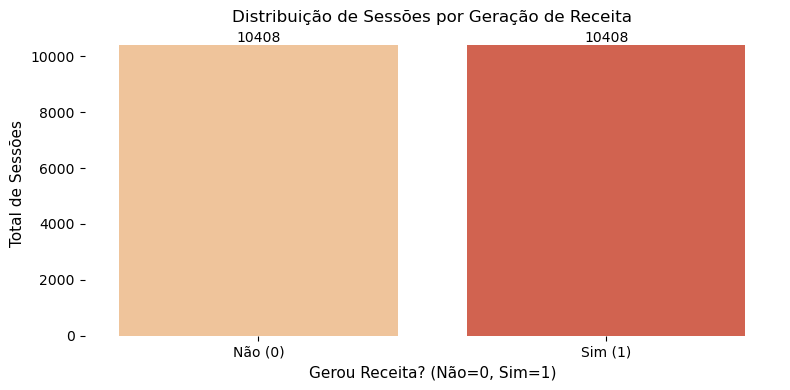

In [224]:
# Plot 

plt.figure(figsize=(8, 4))

# 1. Verifica√ß√£o e prepara√ß√£o dos dados
if not isinstance(y_res, pd.DataFrame):
    y_res = pd.DataFrame(y_res, columns=['Revenue'])

# 2. Garantir que os valores s√£o num√©ricos
y_res['Revenue'] = y_res['Revenue'].astype(int)

# 3. Criar o gr√°fico
ax = sns.countplot(x='Revenue',
                  data=y_res,
                  palette="OrRd",
                  order=sorted(y_res['Revenue'].unique()))

# 4. Customiza√ß√£o do gr√°fico
plt.box(False)
plt.xlabel('Gerou Receita? (N√£o=0, Sim=1)', fontsize=11)
plt.ylabel('Total de Sess√µes', fontsize=11)
plt.title('Distribui√ß√£o de Sess√µes por Gera√ß√£o de Receita', fontsize=12)

# 5. Adicionar valores nas barras (forma segura)
for p in ax.patches:
    height = int(p.get_height())  # Garante que √© um n√∫mero
    ax.annotate(f'{height}',
               (p.get_x() + p.get_width()/2., height),
               ha='center', va='center',
               xytext=(0, 5),
               textcoords='offset points')

# 6. Ajustar r√≥tulos do eixo X
ax.set_xticklabels([f'N√£o ({ax.get_xticks()[0]})', f'Sim ({ax.get_xticks()[1]})'])

plt.tight_layout()
plt.show()

In [230]:
# Shape dos dados originais

df_original.shape

(12316, 18)

In [240]:
# Shape dos dados reamostrados 
# Como fizemos um balanceamento dos dados, podemos perceber que ganhamos mais registros nele.

# Como foi colocado la em cima, o X_RES representa as vari√°veis explicativas.

X_res.shape

(20816, 17)

In [242]:
# Shape dos dados reamostrados 

# Como foi colocado la em cima, o Y_RES representa a vari√°vel target.

y_res.shape

(20816, 1)

In [236]:
# Ajustando X e y
# Para fins de demonstra√ß√£o deste exemplo vou utilizar somente 1.000 observa√ß√µes para n√£o demorar muito o tempo de treinamento
# Por√©m se fosse para fazer mesmo real, teria que fazer para todos.
# modelo

#X = X_res   Aqui n√≥s fariamos com todos os dados
#y = y_res   Aqui n√≥s fariamos com todos os dados

X = X_res.head(1000)
y = y_res.head(1000)

In [244]:
X

Administrative  Administrative_Duration  Informational  \
0               0.0                      0.0            0.0   
1               0.0                      0.0            0.0   
2               0.0                     -1.0            0.0   
3               0.0                      0.0            0.0   
4               0.0                      0.0            0.0   
..              ...                      ...            ...   
995             1.0                     10.0            0.0   
996            10.0                    164.5            1.0   
997             0.0                      0.0            0.0   
998             0.0                      0.0            0.0   
999             0.0                      0.0            0.0   

     Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                       0.0             1.0                 0.000000   
1                       0.0             2.0                64.000000   
2                      -1.0             1.0                -1.000000   
3                       0.0             2.0                 2.666667   
4                       0.0            10.0               627.500000   
..                      ...             ...                      ...   
995                     0.0            39.0              1152.500000   
996                     3.0            61.0              2292.679762   
997                     0.0             9.0               329.000000   
998                     0.0             8.0               111.666667   
999                     0.0            15.0              1074.428571   

     BounceRates  ExitRates  PageValues  SpecialDay  Month  OperatingSystems  \
0       0.200000   0.200000         0.0         0.0      2                 1   
1       0.000000   0.100000         0.0         0.0      2                 2   
2       0.200000   0.200000         0.0         0.0      2                 4   
3       0.050000   0.140000         0.0         0.0      2                 3   
4       0.020000   0.050000         0.0         0.0      2                 3   
..           ...        ...         ...         ...    ...               ...   
995     0.011966   0.017802         0.0         0.0      5                 3   
996     0.000000   0.009552         0.0         0.0      5                 2   
997     0.022222   0.044444         0.0         0.0      5                 2   
998     0.000000   0.025000         0.0         0.0      5                 2   
999     0.015385   0.021538         0.0         0.0      5                 3   

     Browser  Region  TrafficType  VisitorType  Weekend  
0          1       1            1            2    False  
1          2       1            2            2    False  
2          1       9            3            2    False  
3          2       2            4            2    False  
4          3       1            4            2     True  
..       ...     ...          ...          ...      ...  
995        2       1            3            2    False  
996        2       1            1            2    False  
997        2       3            1            2    False  
998        2       1            1            2    False  
999        2       1            1            2    False  

[1000 rows x 17 columns]

In [248]:
y

Revenue
0          0
1          0
2          0
3          0
4          0
..       ...
995        0
996        0
997        0
998        0
999        0

[1000 rows x 1 columns]

A divis√£o dos dados em conjuntos de treino e teste √© uma pr√°tica essencial em Machine Learning para garantir que o modelo:

- Aprenda padr√µes gerais (n√£o apenas decore os dados de treino).

- Tenha desempenho realista em dados nunca vistos antes.

- Evite overfitting (quando o modelo se ajusta demais aos dados de treino e falha em generalizar).

## Evitar Overfitting (Sobreajuste)
Se um modelo for treinado e avaliado nos mesmos dados, ele pode simplesmente "decorar" as respostas (overfitting), em vez de aprender padr√µes √∫teis.

- Exemplo: Um aluno que s√≥ decora as respostas de um simulado, mas n√£o consegue resolver quest√µes novas.

‚úÖ Solu√ß√£o:

- Treinar em 70-80% dos dados (treino).

- Testar em 20-30% separados (teste).

## Avalia√ß√£o Justa do Modelo
O conjunto de teste simula como o modelo se comportar√° com dados nunca vistos. Se o modelo performar bem no treino, mas mal no teste, significa que ele n√£o generaliza bem.

üìä Exemplo de m√° avalia√ß√£o:

- Acur√°cia no treino: 99%

- Acur√°cia no teste: 60%
‚Üí O modelo est√° overfitting!

## Otimiza√ß√£o de Hiperpar√¢metros
Usamos valida√ß√£o cruzada (cross-validation) para ajustar os par√¢metros do modelo sem vazar dados de teste. Isso evita que o modelo seja ajustado para performar bem apenas no teste (data leakage).



In [265]:
# Divis√£o em Dados de Treino e Teste.
# Quando formos criar e treinar o modelo preditivo, passamos cerca de 60/70% dos nossos dados.

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3, random_state = 42)

- O par√¢metro random_state controla a aleatoriedade na divis√£o dos dados entre treino e teste. Quando voc√™ define um valor fixo (como 42), garante que:

- A divis√£o ser√° reproduz√≠vel: Se voc√™ ou outra pessoa executar o c√≥digo novamente, os dados ser√£o divididos exatamente da mesma maneira.

- Resultados consistentes: Importante para testes, compara√ß√£o de modelos e depura√ß√£o.

#### Por que usar random_state?
- Sem random_state: A cada execu√ß√£o, os dados s√£o divididos aleatoriamente, podendo gerar resultados diferentes.

- Com random_state: A divis√£o √© pseudoaleat√≥ria (sempre a mesma para o mesmo valor).

## Modelo SVM

### Modelo Base com Kernel Linear

In [275]:
# Cria o modelo

modelo_v1 = svm.SVC(kernel = 'linear')

In [279]:
# Treinamento

start = time.time()
modelo_v1.fit(X_treino, y_treino) #.FIT √© o m√©todo que vai fazer o treinamento. Xtreino √© a vari√°vel de entrada e ytreino a vari√°vel alvo.
end = time.time()
print('Tempo de Treinamento do Modelo:', end - start) # S√≥ para vermos quanto tempo levou para esse modelo ser treinado. 

Tempo de Treinamento do Modelo: 38.25510287284851


In [281]:
# Previs√µes
# Agora vamos fazer as previs√µes apenas com o modelo de teste.

previsoes_v1 = modelo_v1.predict(X_teste)

In [283]:
# Dicion√°rio de m√©tricas e metadados

SVM_dict_v1 = {'Modelo':'SVM',
               'Vers√£o':'1',
               'Kernel':'Linear',
               'Precision':precision_score(previsoes_v1, y_teste),
               'Recall':recall_score(previsoes_v1, y_teste),
               'F1 Score':f1_score(previsoes_v1, y_teste),
               'Acur√°cia':accuracy_score(previsoes_v1, y_teste),
               'AUC':roc_auc_score(y_teste, previsoes_v1)}

In [285]:
# Print

print("M√©tricas em Teste:\n")
SVM_dict_v1

M√©tricas em Teste:



{'Modelo': 'SVM',
 'Vers√£o': '1',
 'Kernel': 'Linear',
 'Precision': 0.52,
 'Recall': 0.7647058823529411,
 'F1 Score': 0.6190476190476191,
 'Acur√°cia': 0.9466666666666667,
 'AUC': 0.7527272727272728}

### Modelo com Kernel Linear e Dados Padronizados (Scaled)

In [287]:
# ***** Aten√ß√£o *****
# O m√©todo nesta c√©lula n√£o deve ser usado, pois estar√≠amos aplicando o fit em teste e isso n√£o √© o ideal
# Aplicamos o fit somente nos dados de treino e aplicamos o transform nos dados de teste
# Padroniza√ß√£o
# X_treino_scaled = StandardScaler().fit_transform(X_treino)
# X_teste_scaled = StandardScaler().fit_transform(X_teste)

In [289]:
# Agora sim, a forma ideal de aplicar a padroniza√ß√£o em treino e teste
# Padroniza√ß√£o

sc = StandardScaler()
X_treino_scaled = sc.fit_transform(X_treino)
X_teste_scaled = sc.transform(X_teste)

Obseva√ß√£o:

Para impedir que as informa√ß√µes sobre a distribui√ß√£o do conjunto de teste vazem em seu modelo, o ideal √© aplicar a padroniza√ß√£o em separado nos dados de treino e de teste, ajustando o redimensionador apenas aos dados de treinamento, padronizando ent√£o os conjuntos de treinamento e teste com esse redimensionador (exatamente como est√° na c√©lula acima). Ao ajustar o redimensionador no conjunto de dados completo antes da divis√£o em treino e teste, informa√ß√µes sobre o conjunto de testes s√£o usadas para transformar o conjunto de treinamento.

Conhecer a distribui√ß√£o de todo o conjunto de dados pode influenciar como voc√™ detecta e processa outliers, bem como como voc√™ parametriza seu modelo. Embora os dados em si n√£o sejam expostos, h√° informa√ß√µes sobre a distribui√ß√£o dos dados. Como resultado, o desempenho do seu conjunto de testes n√£o √© uma estimativa real do desempenho em dados invis√≠veis.

Sempre aplique a padroniza√ß√£o depois de fazer a divis√£o em treino e teste, exatamente como fizemos aqui. Usamos fit_transform() nos dados de treino e transform() nos dados de teste quando usamos o StandardScaler().

In [291]:
X_treino_scaled

array([[-0.59034343, -0.40561073, -0.31756214, ..., -0.75751167,
         0.33597259, -0.54433105],
       [-0.59034343, -0.40561073, -0.31756214, ..., -0.41048407,
         0.33597259,  1.83711731],
       [ 0.07887179, -0.33356238, -0.31756214, ..., -0.75751167,
         0.33597259, -0.54433105],
       ...,
       [-0.59034343, -0.40561073, -0.31756214, ..., -0.41048407,
        -2.97643326, -0.54433105],
       [ 0.07887179, -0.16326629, -0.31756214, ..., -0.41048407,
        -2.97643326,  1.83711731],
       [-0.59034343, -0.40561073, -0.31756214, ..., -0.41048407,
         0.33597259, -0.54433105]])

In [293]:
X_teste_scaled

array([[ 0.4134794 , -0.02571945, -0.31756214, ..., -0.06345648,
         0.33597259, -0.54433105],
       [-0.25573582, -0.26151404, -0.31756214, ..., -0.41048407,
         0.33597259, -0.54433105],
       [ 1.08269462,  1.52462998,  4.89244178, ..., -0.75751167,
         0.33597259, -0.54433105],
       ...,
       [-0.59034343, -0.40561073, -0.31756214, ..., -0.41048407,
         0.33597259, -0.54433105],
       [-0.25573582, -0.41216058, -0.31756214, ...,  0.63059872,
         0.33597259,  1.83711731],
       [-0.59034343, -0.40561073, -0.31756214, ..., -0.75751167,
         0.33597259,  1.83711731]])

In [295]:
# Cria o modelo

modelo_v2 = svm.SVC(kernel = 'linear')

In [299]:
# Treinamento

start = time.time() # S√≥ para vermos quanto tempo levou para esse modelo ser treinado. 
modelo_v2.fit(X_treino_scaled, y_treino)
end = time.time()
print('Tempo de Treinamento do Modelo:', end - start) # S√≥ para vermos quanto tempo levou para esse modelo ser treinado. 

Tempo de Treinamento do Modelo: 0.009034872055053711


In [301]:
# Previs√µes

previsoes_v2 = modelo_v2.predict(X_teste_scaled)

In [303]:
# Dicion√°rio de m√©tricas e metadados

SVM_dict_v2 = {'Modelo':'SVM',
               'Vers√£o':'2',
               'Kernel':'Linear com Dados Padronizados',
               'Precision':precision_score(previsoes_v2, y_teste),
               'Recall':recall_score(previsoes_v2, y_teste),
               'F1 Score':f1_score(previsoes_v2, y_teste),
               'Acur√°cia':accuracy_score(previsoes_v2, y_teste),
               'AUC':roc_auc_score(y_teste, previsoes_v2)}

In [305]:
# Print

print("M√©tricas em Teste:\n")
SVM_dict_v2

M√©tricas em Teste:



{'Modelo': 'SVM',
 'Vers√£o': '2',
 'Kernel': 'Linear com Dados Padronizados',
 'Precision': 0.48,
 'Recall': 0.8571428571428571,
 'F1 Score': 0.6153846153846154,
 'Acur√°cia': 0.95,
 'AUC': 0.7363636363636362}

### Otimiza√ß√£o de Hiperpar√¢metros com Grid Search e Kernel RBF

In [307]:
# Cria o modelo
modelo_v3 = svm.SVC(kernel = 'rbf')

# Valores para o grid
C_range = np.array([50., 100., 200.])
gamma_range = np.array([0.3*0.001,0.001,3*0.001])

# Grid de hiperpar√¢metros
svm_param_grid = dict(gamma = gamma_range, C = C_range)

# Grid Search
start = time.time()
modelo_v3_grid_search_rbf = GridSearchCV(modelo_v3, svm_param_grid, cv = 3)

# Treinamento
modelo_v3_grid_search_rbf.fit(X_treino_scaled, y_treino)
end = time.time()
print('Tempo de Treinamento do Modelo com Grid Search:', end - start)

# Acur√°cia em Treino
print(f"Acur√°cia em Treinamento: {modelo_v3_grid_search_rbf.best_score_ :.2%}")
print("")
print(f"Hiperpar√¢metros Ideais: {modelo_v3_grid_search_rbf.best_params_}")

Tempo de Treinamento do Modelo com Grid Search: 0.19559574127197266
Acur√°cia em Treinamento: 94.86%

Hiperpar√¢metros Ideais: {'C': 50.0, 'gamma': 0.003}


In [309]:
# Previs√µes

previsoes_v3 = modelo_v3_grid_search_rbf.predict(X_teste_scaled)

In [311]:
# Dicion√°rio de m√©tricas e metadados

SVM_dict_v3 = {'Modelo':'SVM',
               'Vers√£o':'3',
               'Kernel':'RBF com Dados Padronizados',
               'Precision':precision_score(previsoes_v3, y_teste),
               'Recall':recall_score(previsoes_v3, y_teste),
               'F1 Score':f1_score(previsoes_v3, y_teste),
               'Acur√°cia':accuracy_score(previsoes_v3, y_teste),
               'AUC':roc_auc_score(y_teste, previsoes_v3)}

In [313]:
# Print

print("M√©tricas em Teste:\n")
SVM_dict_v3

M√©tricas em Teste:



{'Modelo': 'SVM',
 'Vers√£o': '3',
 'Kernel': 'RBF com Dados Padronizados',
 'Precision': 0.52,
 'Recall': 0.8666666666666667,
 'F1 Score': 0.65,
 'Acur√°cia': 0.9533333333333334,
 'AUC': 0.7563636363636363}

### Otimiza√ß√£o de Hiperpar√¢metros com Grid Search e Kernel Polinomial

In [315]:
# Cria o modelo
modelo_v4 = svm.SVC(kernel = 'poly')

# Valores para o grid
r_range =  np.array([0.5, 1])
gamma_range =  np.array([0.001, 0.01])
d_range = np.array([2,3, 4])

# Grid de hiperpar√¢metros
param_grid_poly = dict(gamma = gamma_range, degree = d_range, coef0 = r_range)

# Grid Search
start = time.time()
modelo_v4_grid_search_poly = GridSearchCV(modelo_v4, param_grid_poly, cv = 3)

# Treinamento
modelo_v4_grid_search_poly.fit(X_treino_scaled, y_treino)
end = time.time()
print('Tempo de Treinamento do Modelo com Grid Search:', end - start)

# Acur√°cia em Treino
print(f"Acur√°cia em Treinamento: {modelo_v4_grid_search_poly.best_score_ :.2%}")
print("")
print(f"Hiperpar√¢metros Ideais: {modelo_v4_grid_search_poly.best_params_}")

Tempo de Treinamento do Modelo com Grid Search: 0.17860007286071777
Acur√°cia em Treinamento: 94.86%

Hiperpar√¢metros Ideais: {'coef0': 1.0, 'degree': 3, 'gamma': 0.01}


In [317]:
# Previs√µes

previsoes_v4 = modelo_v4_grid_search_poly.predict(X_teste_scaled)

In [319]:
# Dicion√°rio de m√©tricas e metadados

SVM_dict_v4 = {'Modelo':'SVM',
               'Vers√£o':'4',
               'Kernel':'Polinomial com Dados Padronizados',
               'Precision':precision_score(previsoes_v4, y_teste),
               'Recall':recall_score(previsoes_v4, y_teste),
               'F1 Score':f1_score(previsoes_v4, y_teste),
               'Acur√°cia':accuracy_score(previsoes_v4, y_teste),
               'AUC':roc_auc_score(y_teste, previsoes_v4)}

In [321]:
# Print

print("M√©tricas em Teste:\n")
SVM_dict_v4

M√©tricas em Teste:



{'Modelo': 'SVM',
 'Vers√£o': '4',
 'Kernel': 'Polinomial com Dados Padronizados',
 'Precision': 0.4,
 'Recall': 0.7692307692307693,
 'F1 Score': 0.5263157894736842,
 'Acur√°cia': 0.94,
 'AUC': 0.6945454545454546}

In [323]:
# Concatena todos os dicion√°rios em um dataframe do Pandas

resumo = pd.DataFrame({'SVM_Modelo_1':pd.Series(SVM_dict_v1),
                       'SVM_Modelo_2':pd.Series(SVM_dict_v2),
                       'SVM_Modelo_3':pd.Series(SVM_dict_v3),
                       'SVM_Modelo_4':pd.Series(SVM_dict_v4)})

In [327]:
# Print

resumo

SVM_Modelo_1                   SVM_Modelo_2  \
Modelo             SVM                            SVM   
Vers√£o               1                              2   
Kernel          Linear  Linear com Dados Padronizados   
Precision         0.52                           0.48   
Recall        0.764706                       0.857143   
F1 Score      0.619048                       0.615385   
Acur√°cia      0.946667                           0.95   
AUC           0.752727                       0.736364   

                         SVM_Modelo_3                       SVM_Modelo_4  
Modelo                            SVM                                SVM  
Vers√£o                              3                                  4  
Kernel     RBF com Dados Padronizados  Polinomial com Dados Padronizados  
Precision                        0.52                                0.4  
Recall                       0.866667                           0.769231  
F1 Score                         0.65                           0.526316  
Acur√°cia                     0.953333                               0.94  
AUC                          0.756364                           0.694545